In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
pd.set_option('display.max_columns', 30)
sleep = pd.read_csv('./sleeping-alone-data.csv')

In [2]:
sleep.head(2)

,StartDate,EndDate,Which of the following best describes your current relationship status?,"How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.","When both you and your partner are at home, how often do you sleep in separate beds?","When you're not sleeping in the same bed as your partner, where do you typically sleep?",Unnamed: 6,"When you're not sleeping in the same bed, where does your partner typically sleep?",Unnamed: 8,What are the reasons that you sleep in separate beds? Please select all that apply.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,When was the first time you slept in separate beds?,"To what extent do you agree with the following statement: ""sleeping in separate beds helps us to stay together.""","To what extent do you agree with the following statement: ""we sleep better when we sleep in separate beds.""","To what extent do you agree with the following statement: ""our sex life has improved as a result of sleeping in separate beds.""",Which of the following best describes your current occupation?,Unnamed: 25,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,Response,Response,Response,Response,Other (please specify),Response,Other (please specify),One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,We are no longer physically intimate,We have different temperature preferences for ...,We've had an argument or fight,...,Do not want to share the covers,One of us needs to sleep with a child,Night working/very different sleeping times,Other (please specify),Response,Response,Response,Response,Response,Other (please specify),Response,Response,Response,Response,Response
1,7/10/14 18:37,7/10/14 18:39,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,NaN,"My partner sleeps in our shared bed, I'm the o...",NaN,NaN,NaN,One of us is sick,NaN,NaN,NaN,...,NaN,NaN,NaN,Other (please specify),Within the first 1-5 years of our relationship,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific


It looks like the first row of data is nonsense. So let's go ahead and drop this row.

In [3]:
sleep = sleep.drop(sleep.index[0])

# Breakdown of a respondant's current relationship status

In [4]:
relationship = sleep["Which of the following best describes your current relationship status?"].value_counts().reset_index(name='Responders')

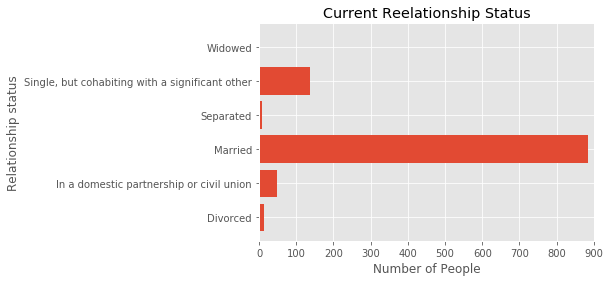

In [5]:
status = [x for x in relationship['index']]

plt.barh(relationship['index'], relationship['Responders'])
plt.xlabel("Number of People")
plt.ylabel("Relationship status")
plt.title("Current Reelationship Status")
plt.xlim(0, 900)
plt.show()

# What's the longest and shortest time range for each unique relationsip status?

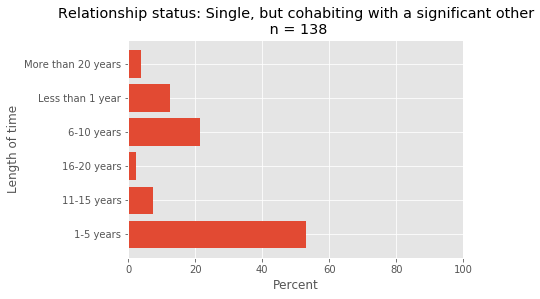

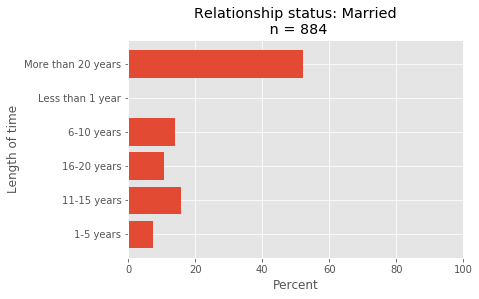

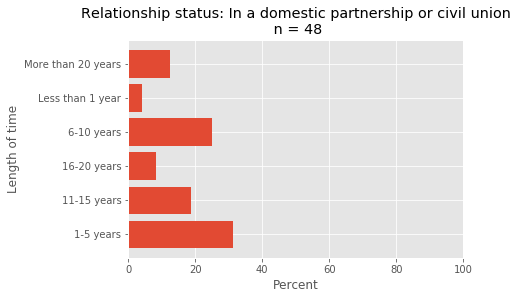

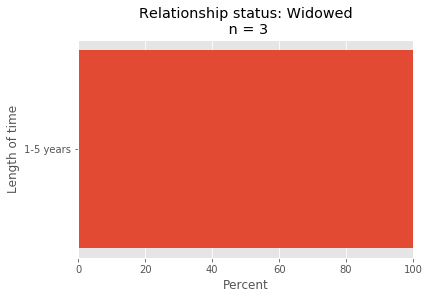

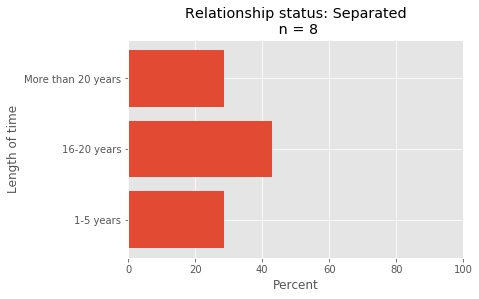

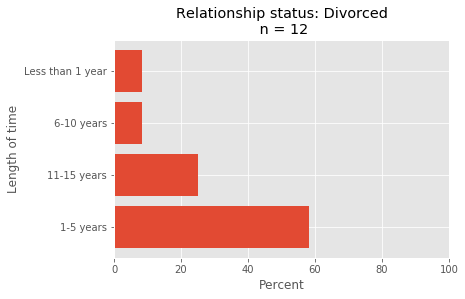

In [6]:
for status in sleep['Which of the following best describes your current relationship status?'].unique():
    df = sleep[sleep['Which of the following best describes your current relationship status?'] == status]
    vcdf = df['How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your last relationship.'].value_counts(
        normalize=True).reset_index(name='percent')
    plt.title("Relationship status: {}\n n = {}".format(status, df.shape[0]))
    plt.xlabel('Percent')
    plt.ylabel('Length of time')
    plt.xlim((0,100))
    plt.barh(vcdf['index'], vcdf['percent'] * 100)
    plt.show()

# What's the distribution of those who sleep in separate beds when both are at home?

In [7]:
often_seperate = sleep["When both you and your partner are at home, how often do you sleep in separate beds?"].value_counts(normalize=True).reset_index(name = 'Percent')

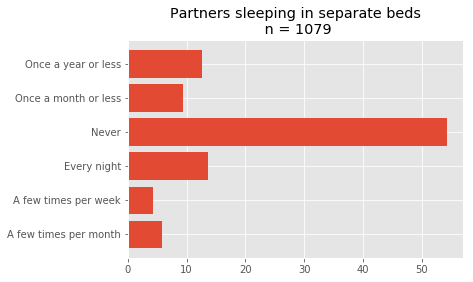

In [8]:
plt.barh(often_seperate['index'], often_seperate['Percent'] * 100)
plt.title("Partners sleeping in separate beds\n n = {}".format(
    sleep["When both you and your partner are at home, how often do you sleep in separate beds?"]
    .value_counts().sum()))
plt.show()

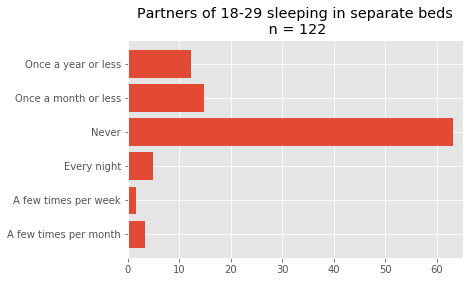

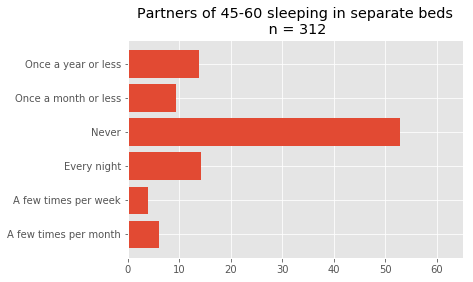

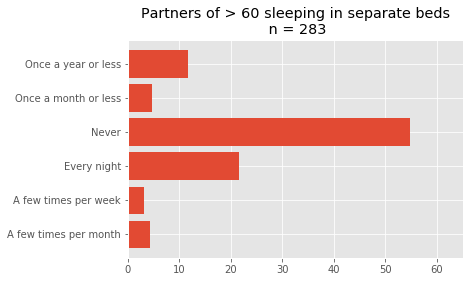

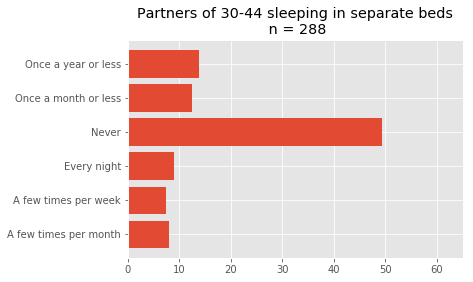

In [38]:
age_clean = sleep[pd.isnull(sleep['Age']) == False]
for age in age_clean['Age'].unique():
    df = age_clean[age_clean['Age'] == age]
    vcdf = df["When both you and your partner are at home, how often do you sleep in separate beds?"].value_counts(normalize=True).reset_index(name = 'Percent')
    plt.barh(vcdf['index'], vcdf['Percent'] * 100)
    plt.title("Partners of {} sleeping in separate beds\n n = {}".format(age, df.shape[0]))
    plt.xlim(0,65)
    plt.show()

# Do people tend to sleep in the different beds straight away?

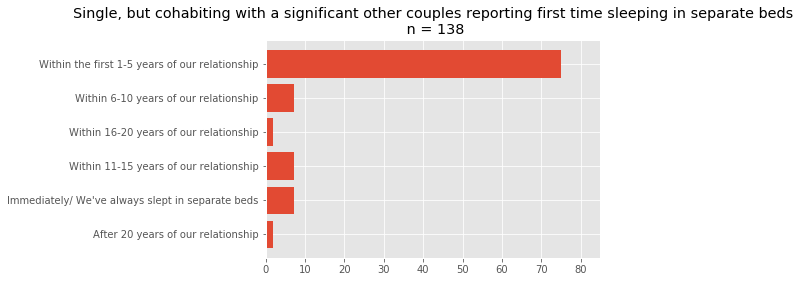

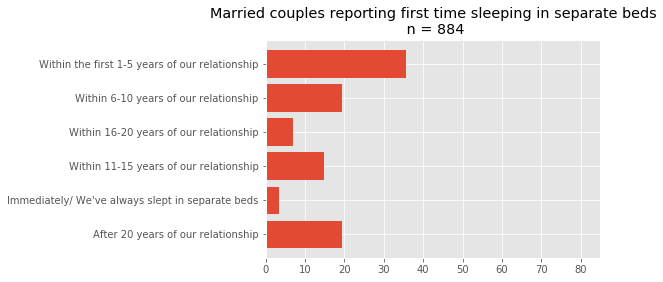

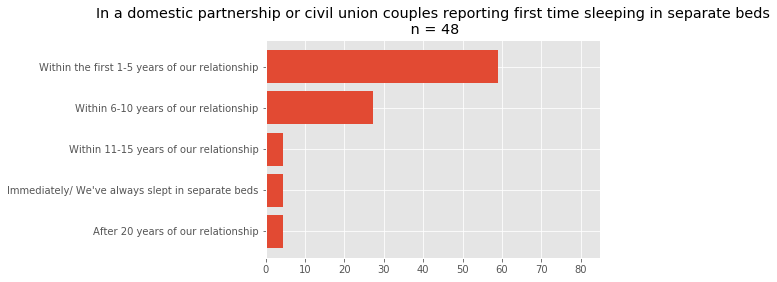

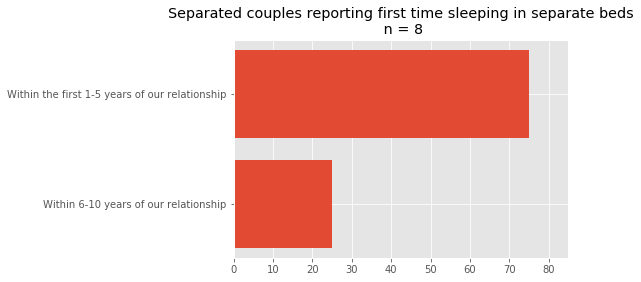

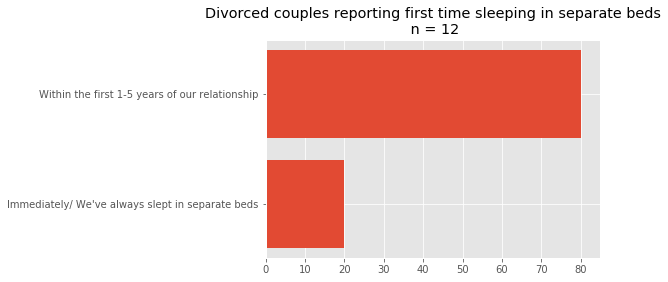

In [56]:
for status in sleep['Which of the following best describes your current relationship status?'].unique():
    if status == 'Widowed':
        pass
    else:
        df = sleep[sleep['Which of the following best describes your current relationship status?'] == status]
        vcdf = df["When was the first time you slept in separate beds?"].value_counts(normalize=True).reset_index(name = 'Percent')
        plt.barh(vcdf['index'], vcdf['Percent'] * 100)
        plt.title("{} couples reporting first time sleeping in separate beds\n n = {}".format(status, df.shape[0]))
        plt.xlim(0, 85)
        plt.show()

# What's the breakdown of the reasons people report as reasons they sleep in separate beds?

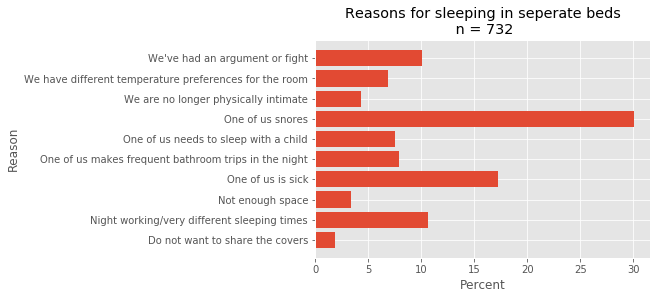

In [12]:
reasons_cols = ['What are the reasons that you sleep in separate beds? Please select all that apply.',
                'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19']

reasons = {}
for col in reasons_cols:
    for r in sleep[col]:
        if r in (np.nan, 'Other (please specify)'):
            pass
        elif r in reasons:
            reasons[r] += 1
        else:
            reasons[r] = 1
            
def normalize(d, target=1.0):
   raw = sum(d.values())
   factor = target/raw
   return {key:value*factor*100 for key,value in d.items()}        

plt.barh(*zip(*sorted(normalize(reasons).items())))
plt.title("Reasons for sleeping in seperate beds\n n = {}".format(sum(reasons.values())))
plt.xlabel("Percent")
plt.ylabel("Reason")
plt.show()

# Out of all responders, does sleeping in seperate beds help or hurt or relationships?

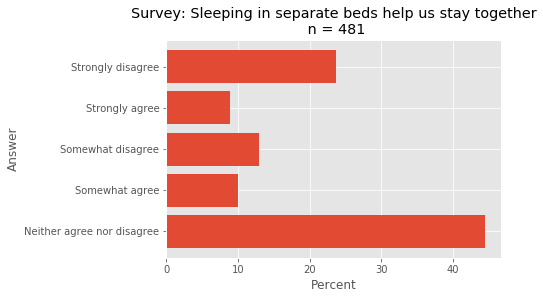

In [13]:
seperate_hurt = sleep["To what extent do you agree with the following statement: \"sleeping in separate beds helps us to stay together.\""].value_counts(normalize=True).reset_index(name='Responders')

plt.barh(seperate_hurt['index'], seperate_hurt['Responders'] * 100)
plt.xlabel('Percent')
plt.ylabel('Answer')
plt.title('Survey: Sleeping in separate beds help us stay together\n n = {}'.format(
    sleep["To what extent do you agree with the following statement: \"sleeping in separate beds helps us to stay together.\""]
    .value_counts()
    .sum())
         )
plt.show()

# Does sleeping in seperate beds help couples sleep beter?

In [14]:
sleep_better = sleep["To what extent do you agree with the following statement: \"we sleep better when we sleep in separate beds.\""].value_counts(normalize=True).reset_index(name='Percent')

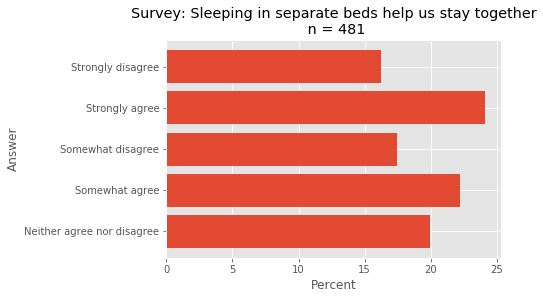

In [15]:
plt.barh(sleep_better['index'], sleep_better['Percent'] * 100)
plt.xlabel('Percent')
plt.ylabel('Answer')
plt.title('Survey: Sleeping in separate beds help us stay together\n n = {}'.format(
    sleep["To what extent do you agree with the following statement: \"we sleep better when we sleep in separate beds.\""]
    .value_counts()
    .sum())
         )
plt.show()

# Does sex life improve as a result of sleeping in separate beds?

In [16]:
sex_life = sleep["To what extent do you agree with the following statement: \"our sex life has improved as a result of sleeping in separate beds.\""].value_counts(
    normalize=True).reset_index(name='Percent')

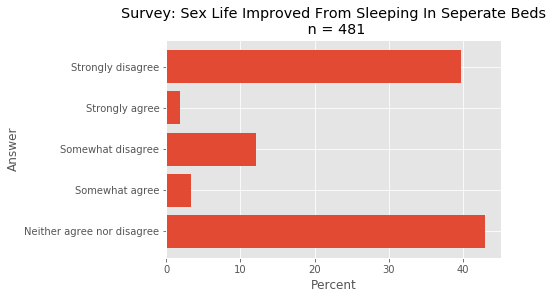

In [17]:
plt.barh(sex_life['index'], sex_life['Percent'] * 100)
plt.xlabel('Percent')
plt.ylabel('Answer')
plt.title('Survey: Sex Life Improved From Sleeping In Seperate Beds\n n = {}'.format(
    sleep["To what extent do you agree with the following statement: \"our sex life has improved as a result of sleeping in separate beds.\""]
    .value_counts()
    .sum())
         )
plt.show()

# What's the breakdown of education by gender?

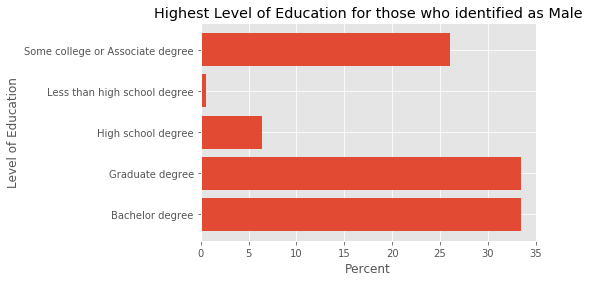

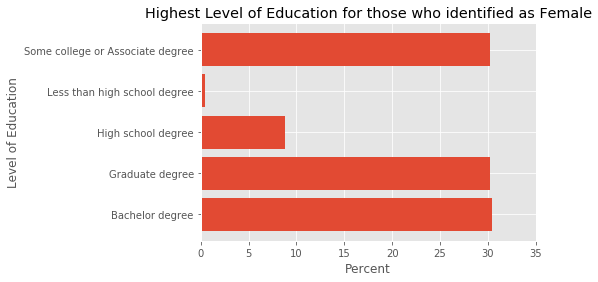

In [18]:
for gender in sleep['Gender'].unique():
    if gender in ('Male', 'Female'):
        df = sleep[sleep['Gender'] == gender]
        vcdf = df['Education'].value_counts(normalize=True).reset_index(name='percent')
        plt.title("Highest Level of Education for those who identified as {}".format(gender))
        plt.xlabel('Percent')
        plt.ylabel('Level of Education')
        plt.xlim(0, 35)
        plt.barh(vcdf['index'], vcdf['percent'] * 100)
        plt.show()

# Education by age

- Two people between the ages of 18 and 29 doesn't have a high school degree
- Two people between the ages of 45 and 60 doesn't have a high school degree
- One person above the age of 60 doesn't have a high school degree

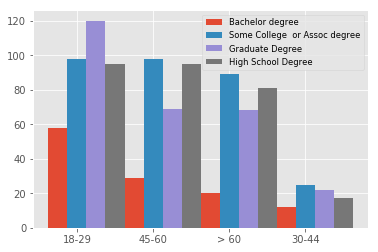

In [19]:
width = 0.25  # the width of the bars
labels = [age for age in sleep['Age'].unique() if age is not np.nan]

twenties = [x for x in sleep[(sleep["Age"] == '18-29') & (sleep['Education'] != 'Less than high school degree')]['Education'].value_counts()]
fourties = [x for x in sleep[(sleep["Age"] == '45-60') & (sleep['Education'] != 'Less than high school degree')]['Education'].value_counts()]
thirties = [x for x in sleep[(sleep["Age"] == '> 60') & (sleep['Education'] != 'Less than high school degree')]['Education'].value_counts()]
sixties = [x for x in sleep[(sleep["Age"] == '30-44') & (sleep['Education'] != 'Less than high school degree')]['Education'].value_counts()]

x1 = np.arange(len(twenties))  # the label locations
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]

plt.bar(x1, twenties, width = width, label = 'Bachelor degree')
plt.bar(x2, fourties, width = width, label = 'Some College  or Assoc degree')
plt.bar(x3, thirties, width = width, label = 'Graduate Degree')
plt.bar(x4, sixties, width = width, label = 'High School Degree')

plt.xticks([x + width for x in range(len(x1))], labels)
plt.legend(fontsize='small')
plt.show()